In [31]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_table('C:\\Users\\C-292-1.txt', delim_whitespace=True, index_col='M__DEPTH')

data=data.replace('-999.00000',np.nan)

data=data.rename(columns=({'M__DEPTH':'DEPT'}))
data['DEPT']=data.index

In [38]:
myfile = open("C:\\Users\\C-292-1.txt")
txt = myfile.read()
print(txt)
myfile.close()

M__DEPTH SP 	GR	CALI	RHOB	DT	NPHI   	MSFL	ILD													
8200	3	53	12.1	2.21	114	0.45	0.6	0.6												
8200.5	4	54	12.1	2.22	114	0.44	0.7	0.5												
8201	5	54	12.1	2.21	115	0.42	0.7	0.5												
8201.5	5	54	12	2.21	115	0.41	0.6	0.5												
8202	5	53	12	2.21	114	0.41	0.7	0.5												
8202.5	5	53	12	2.21	114	0.42	0.7	0.5												
8203	5	54	12	2.21	113	0.42	0.7	0.5												
8203.5	5	54	11.9	2.22	114	0.43	0.7	0.5												
8204	5	55	11.9	2.23	113	0.44	0.7	0.5												
8204.5	6	55	11.8	2.24	113	0.45	0.7	0.5												
8205	6	54	11.6	2.24	114	0.45	0.8	0.5												
8205.5	6	55	11.4	2.23	113	0.44	0.8	0.5												
8206	6	58	11.2	2.23	111	0.43	0.7	0.5												
8206.5	6	61	11	2.24	110	0.4	0.8	0.6												
8207	6	64	10.9	2.26	108	0.38	1.3	0.6												
8207.5	6	65	11	2.28	107	0.37	2.2	0.6												
8208	5	63	11.1	2.31	107	0.38	1.3	0.6												
8208.5	4	58	11	2.32	107	0.4	0.9	0.6												
8209	4	57	11	2.32	107	0.4	0.9	0.6												
8209.5	5	58

In [32]:
#Add formation tops & depth from the Geologic Report to lists

tops = ('Zone-1','zone-2','zone-3', 'zone-4','zone-5','zone-6','zone-7', 'zone-8')
tops_depths=(8200,8228,8312.5,8491.5,8642.5, 8700,8857,9220.5)

In [17]:
#2. Display the logs
#A triple-combo display will be created in matplotlib in order to visualize the curves. The template will be incorporated into the triple combo_plot function dependent on the selection of top and bottom depths of the graph.

#The triple combo display will consist in:

#First track: GR, SP, CALI
#Second track: Resistivities
#Third Track: Density, Sonic and Neutronic


In [36]:
# Create the figure and subplots
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=data[(data.DEPT >= bottom_depth) & (data.DEPT <= top_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10), sharey=True)
    fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
        

        
#1st track: GR, CALI, SP track
    
    ax01=ax[0].twiny()
    ax01.set_xlim(-100,100)
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel("SP [mV]")
    ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='blue')
    ax01.set_xlabel('SP[mV]',color='blue')    
    ax01.tick_params(axis='x', colors='blue')
    ax01.grid(True)
    
    ax02=ax[0].twiny()
    ax02.set_xlim(6,36)
    ax02.plot(logs.CALI, logs.DEPT, '--', label='CALN[in]', color='black') 
    ax02.spines['top'].set_position(('outward',40))
    ax02.set_xlabel('CALI[in]',color='black')    
    ax02.tick_params(axis='x', colors='black')
    
    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs.GR, logs.DEPT, label='GR[api]', color='green') 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')

    
#2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(0.1,100)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[m.ohm]', color='red')
    ax11.plot(logs.ILD, logs.DEPT, label='ILD[m.ohm]', color='red')
    ax11.tick_params(axis='x', colors='red')    
    
    ax12=ax[1].twiny()
    ax12.set_xlim(0.1,100)
    ax12.set_xscale('log')
    ax12.plot(logs.MSFL, logs.DEPT, label='MSFL[m.ohm]', color='purple') 
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel('MSFL[m.ohm]', color='purple')    
    ax12.tick_params(axis='x', colors='purple')
    

    
#3rd track: DT, RHOB, NPHI track
    
    ax21=ax[2].twiny()
    ax21.grid(True)
    ax21.set_xlim(140,40)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel('DT[us/ft]')
    ax21.plot(logs.DT, logs.DEPT, label='DT[us/ft]', color='blue')
    ax21.set_xlabel('DT[us/ft]', color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(-15,45)
    ax22.invert_xaxis()
    ax22.plot(logs.NPHI, logs.DEPT, label='NPHI[%]', color='green') 
    ax22.spines['top'].set_position(('outward',40))
    ax22.set_xlabel('NPHI[%]', color='green')    
    ax22.tick_params(axis='x', colors='green')
    
    ax23=ax[2].twiny()
    ax23.set_xlim(1.95,2.95)
    ax23.plot(logs.RHOB, logs.DEPT ,label='RHOB[g/cc]', color='red') 
    ax23.spines['top'].set_position(('outward',80))
    ax23.set_xlabel('RHOB[g/cc]',color='red')
    ax23.tick_params(axis='x', colors='red')
    
    #plt.savefig ('triple_combo_plot.png', dpi=200, format='png')
    
  


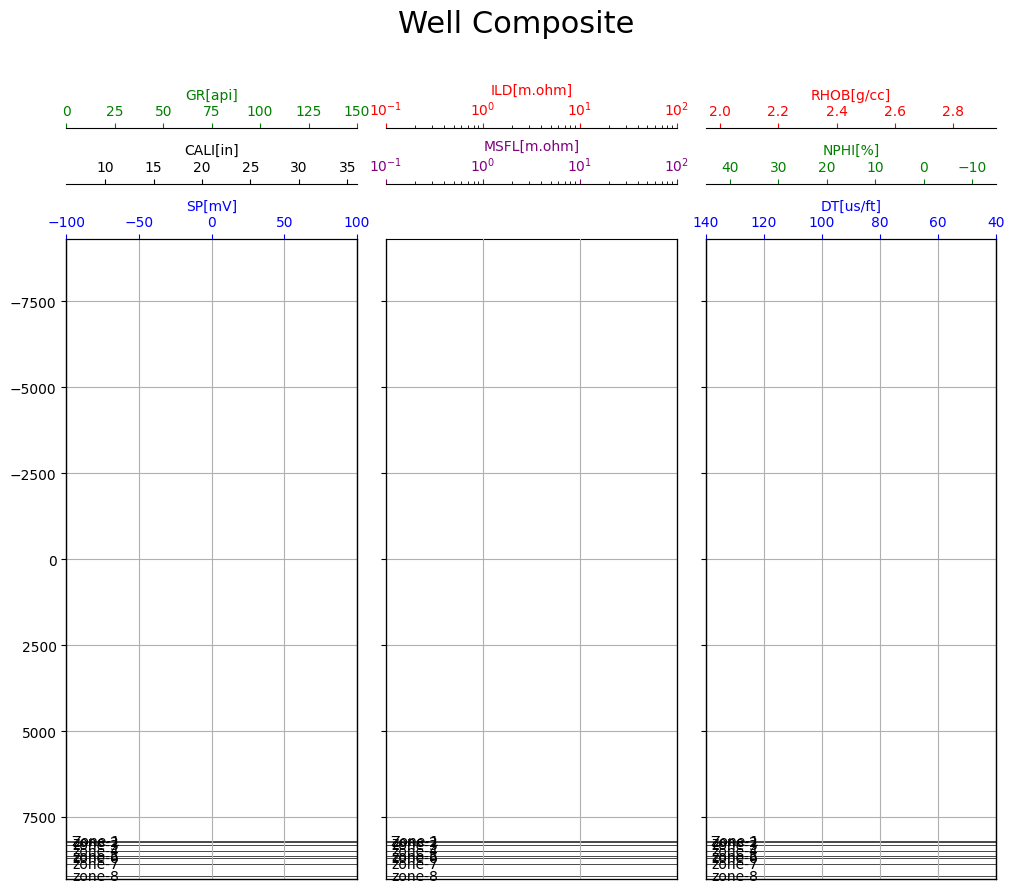

In [37]:
#%matplotlib nbagg

triple_combo_plot(data.DEPT.min(),data.DEPT.max())


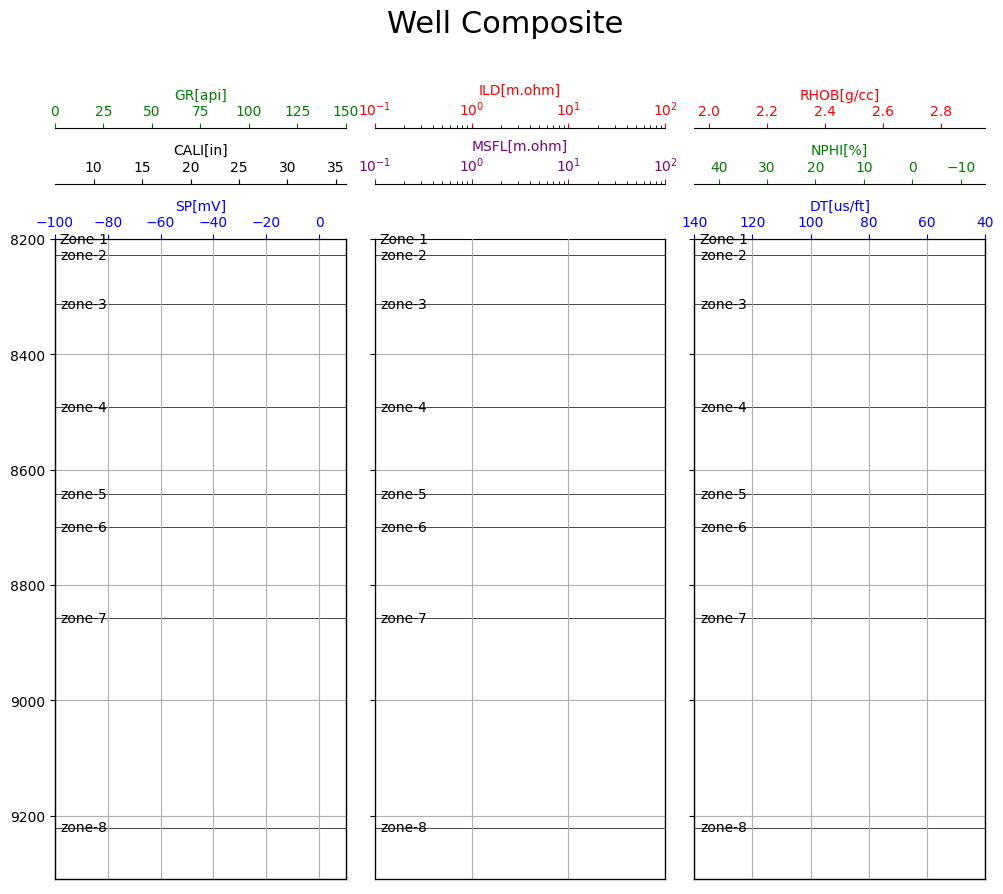

In [35]:
top_depth= 8200
bottom_depth=9310

triple_combo_plot(top_depth,bottom_depth)

In [10]:
#VCLGR
def vclgr(gr_log, gr_clean, gr_clay, correction=None):

    igr=(gr_log-gr_clean)/(gr_clay-gr_clean)       #Linear Gamma Ray
    vclgr_larionov_young=0.083*(2**(3.7*igr)-1)   #Larionov (1969) - Tertiary rocks
    vclgr_larionov_old=0.33*(2**(2*igr)-1)        #Larionov (1969) - Older rocks
    vclgr_clavier=1.7-(3.38-(igr+0.7)**2)**0.5    #Clavier (1971)
    vclgr_steiber=0.5*igr/(1.5-igr)               #Steiber (1969) - Tertiary rocks

    if correction == "young":
        vclgr=vclgr_larionov_young
    elif correction == "older":
        vclgr=vclgr_larionov_old
    elif correction=="clavier":
        vclgr=vclgr_clavier
    elif correction=="steiber":
        vclgr=vclgr_steiber
    else:
        vclgr=igr
    return vclgr

#VCLSP
def vclsp(sp_log, sp_clean, sp_clay):
    vclsp=(sp_log-sp_clean)/(sp_clay-sp_clean)
    return vclsp

#VCLRT
def vclrt(rt_log, rt_clean,rt_clay):
    vrt=(rt_clay/rt_log)*(rt_clean-rt_log)/(rt_clean-rt_clay)
    if (rt_log > 2* rt_clay):
        vclrt = 0.5 * (2 * vrt)** (0.67*(vrt+1)) 
    else:
        vclrt = vrt
    return vclrt

#VCLND
def vclnd(neut_log,den_log,neut_clean1,den_clean1,neut_clean2,den_clean2,neut_clay,den_clay):
    term1 = (den_clean2-den_clean1)*(neut_log-neut_clean1)-(den_log-den_clean1)*(neut_clean2-neut_clean1)
    term2 =(den_clean2-den_clean1)*(neut_clay-neut_clean1)-(den_clay-den_clean1)*(neut_clean2-neut_clean1)
    vclnd=term1/term2
    return vclnd

In [25]:
# Input parameters 
logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]

gr_clean, gr_clay = 12, 77
sp_clean, sp_clay = -97,8






Text(0, 0.5, 'Frequency')

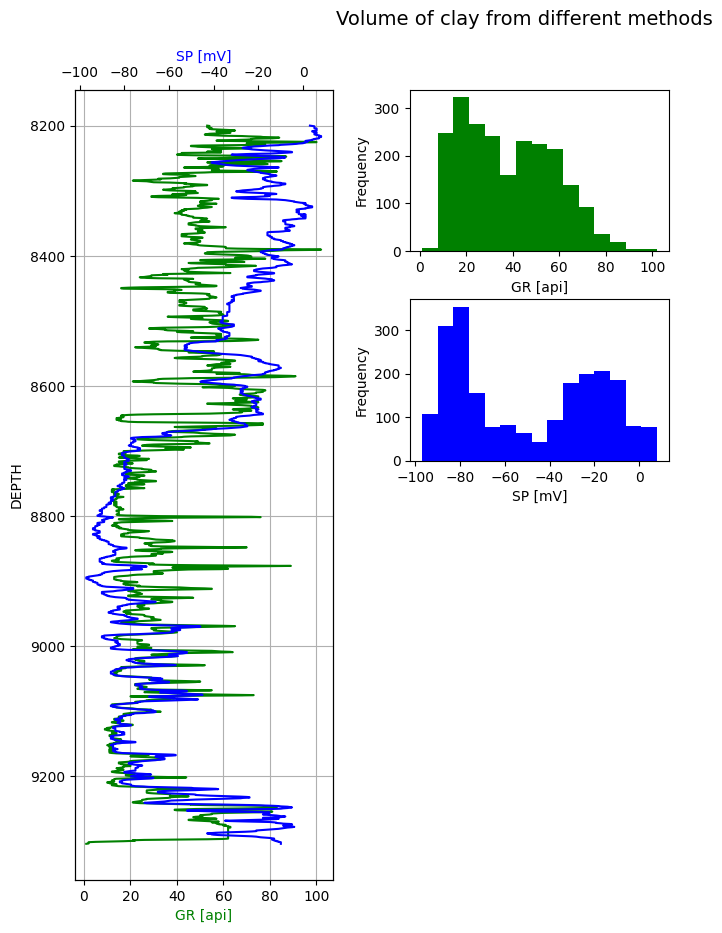

In [30]:
from matplotlib import gridspec

#logs=data.iloc[[top_depth],[bottom_depth]]
#logs=data[(data.DEPT >= top_depth) & (data.DEPT <= bottom_depth)]
#print (logs.GR,logs.LLD)
#Setting GRAPH ELEMENTS

fig = plt.figure(figsize=(12,10))
fig.suptitle('Volume of clay from different methods',fontsize=14)
fig.subplots_adjust(top=0.90,wspace=0.3, hspace =0.3)

gs = gridspec.GridSpec(4, 3)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1])



# Graph for GR,SP

ax1.invert_yaxis()
ax1.grid(True)
ax1.set_ylabel('DEPTH')
ax1.plot(logs.GR, logs.DEPT, color='green')
ax1.set_xlabel('GR [api]', color='green')

ax11=ax1.twiny()
ax11.plot(logs.SP, logs.DEPT, color='blue')
ax11.set_xlabel("SP [mV]",color='blue')


#The graph of GR histogram
ax2.hist(logs.GR.dropna(),bins=15,color='green')
ax2.set_xlabel('GR [api]')
ax2.set_ylabel('Frequency')

ax3.hist(logs.SP.dropna(),bins=15, color='blue')
ax3.set_xlabel('SP [mV]')
ax3.set_ylabel('Frequency')






#plt.savefig ('vcl_plot.png', dpi=200, format='png')